# Наивный байесовский классификатор

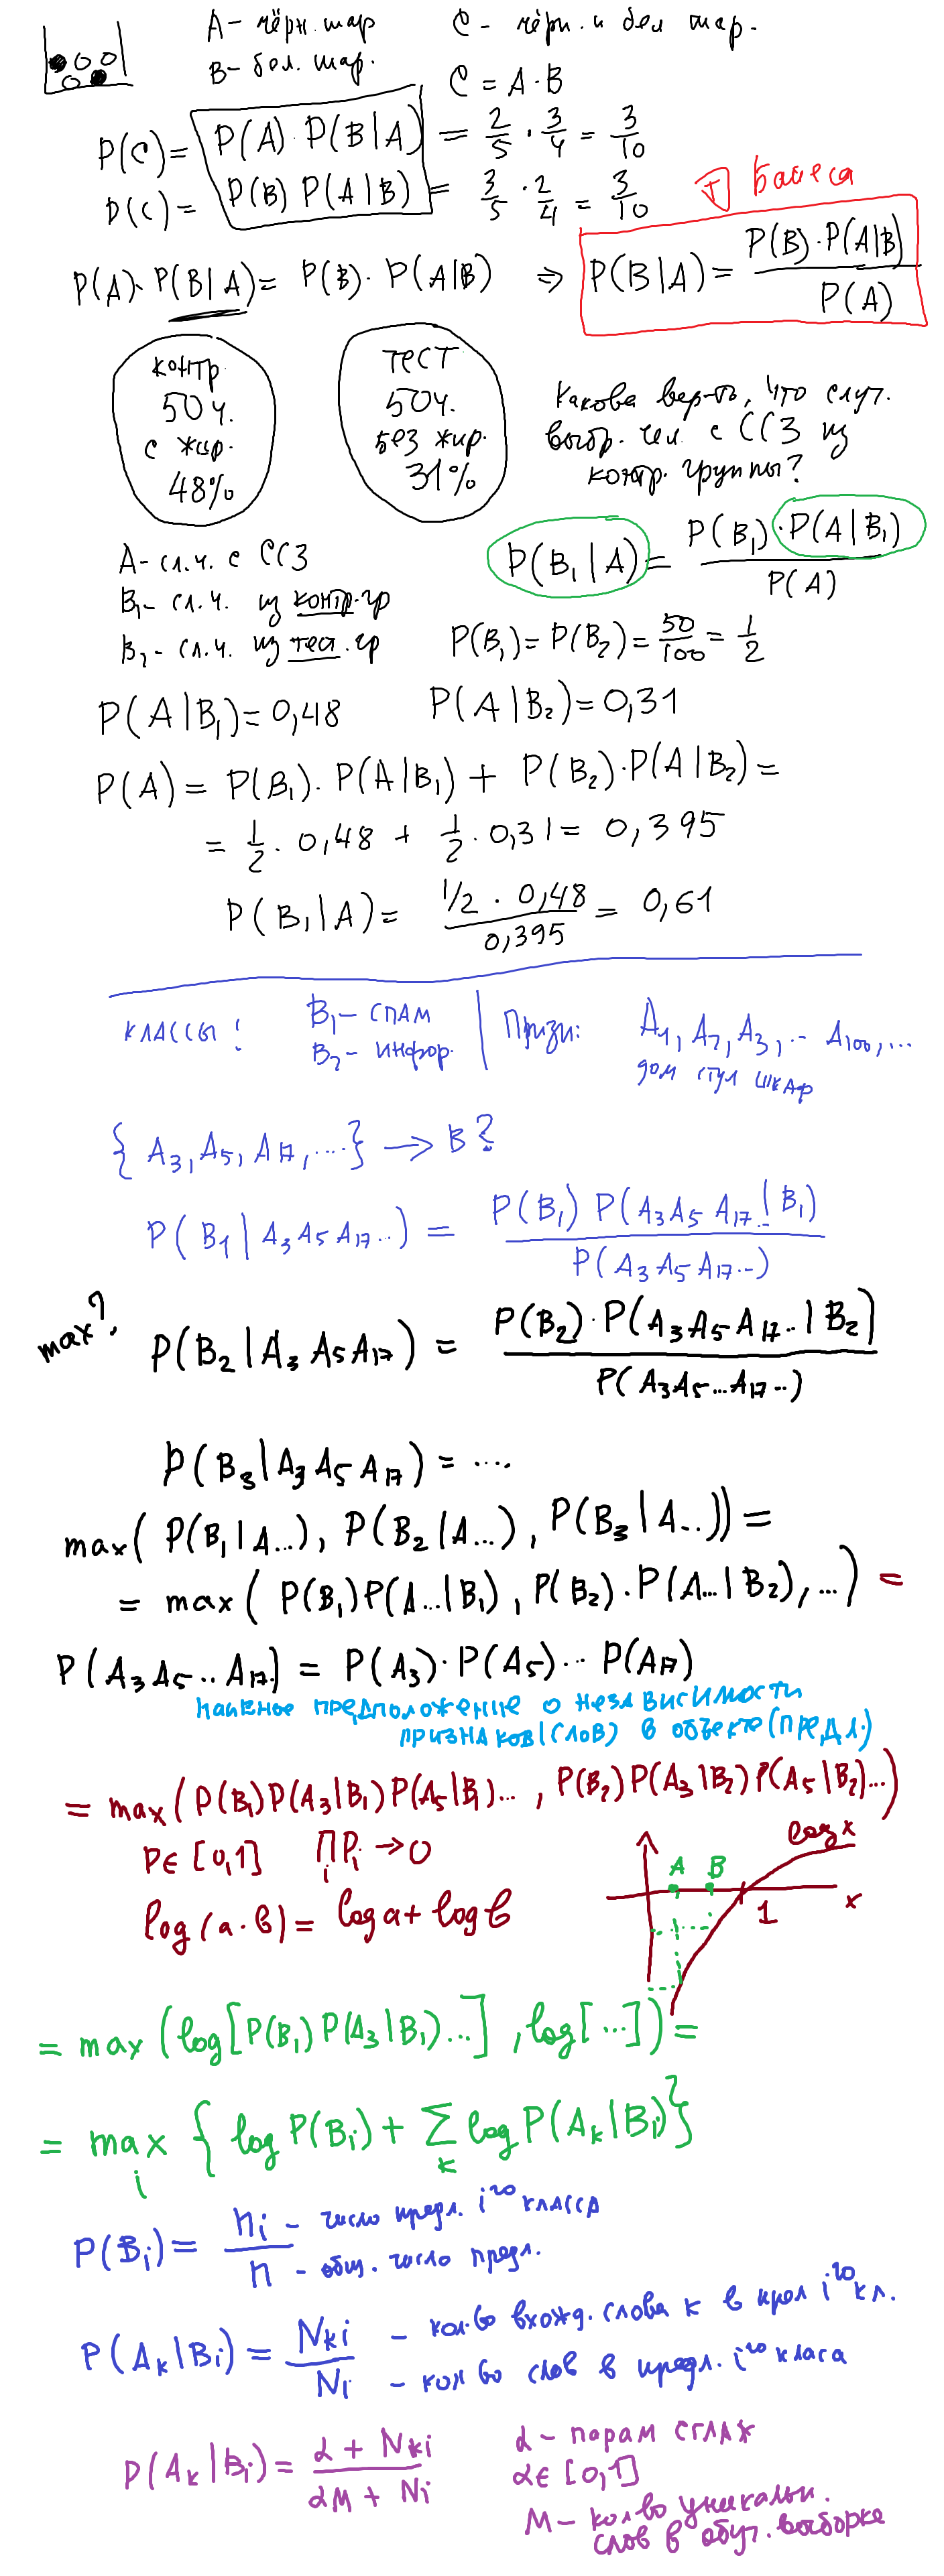

In [1]:
import numpy as np

In [2]:
# Данные

spam = ['Путевки по низкой цене!',
        'Акция! Купи шоколадку и получи телефон в подарок']

inf = ['Завтра состоится собрание.', 
       'Купи килограмм яблок и шоколадку.']

test = ['В магазине гора яблок. Купи семь килограмм и шоколадку.',
       'Акция! Получи шоколадку по низкой цене.']

In [3]:
# Предобработка данных

noise = ['.', ',', '!', '?']

def make_dict(list1):
    result = []
    for text in list1:
        words = text.split()
        temp = []
        for word in words:
            for n in noise:
                word = word.replace(n, '')
            if len(word) > 3:
                temp += [word.lower()]
        result += [temp]
        # print(temp)
        
    return result


make_dict(inf)


[['завтра', 'состоится', 'собрание'],
 ['купи', 'килограмм', 'яблок', 'шоколадку']]

In [4]:
dataset = []

for item in make_dict(spam):
    dataset += [[item, 0]]
    
for item in make_dict(inf):
    dataset += [[item, 1]]
    
print(dataset)

[[['путевки', 'низкой', 'цене'], 0], [['акция', 'купи', 'шоколадку', 'получи', 'телефон', 'подарок'], 0], [['завтра', 'состоится', 'собрание'], 1], [['купи', 'килограмм', 'яблок', 'шоколадку'], 1]]


In [5]:
# Обучение

def fit(dataset, alpha):
    classes, freq, tot_in_cl, total = {}, {}, {}, set()
    for features, label in dataset:
        if label not in classes:
            classes[label] = 0
            tot_in_cl[label] = 0
        classes[label] += 1
        for feature in features:
            if (feature,label) not in freq:
                freq[(feature,label)] = 0
            freq[(feature,label)] += 1
            tot_in_cl[label] += 1
            total.add(feature)
            
    for feature, label in freq:
        freq[(feature,label)] = (alpha+freq[(feature,label)] / (alpha*len(total)+tot_in_cl[label]))
    for cl in classes:
        classes[cl] /= len(dataset)
        
    return alpha, classes, freq, tot_in_cl, len(total)


def predict(classifier, features):
    alpha, classes, freq, tot_in_cl, len_total = classifier
    return max(classes.keys(),
               key = lambda cl:
               np.log10(classes[cl]) +
               sum(np.log10(freq.get((feature,cl), alpha/(alpha*len_total+tot_in_cl[cl]))) \
                  for feature in features))

In [6]:
model = fit(dataset, 1)
fit(dataset, 1)

(1,
 {0: 0.5, 1: 0.5},
 {('путевки', 0): 1.0434782608695652,
  ('низкой', 0): 1.0434782608695652,
  ('цене', 0): 1.0434782608695652,
  ('акция', 0): 1.0434782608695652,
  ('купи', 0): 1.0434782608695652,
  ('шоколадку', 0): 1.0434782608695652,
  ('получи', 0): 1.0434782608695652,
  ('телефон', 0): 1.0434782608695652,
  ('подарок', 0): 1.0434782608695652,
  ('завтра', 1): 1.0476190476190477,
  ('состоится', 1): 1.0476190476190477,
  ('собрание', 1): 1.0476190476190477,
  ('купи', 1): 1.0476190476190477,
  ('килограмм', 1): 1.0476190476190477,
  ('яблок', 1): 1.0476190476190477,
  ('шоколадку', 1): 1.0476190476190477},
 {0: 9, 1: 7},
 14)

In [7]:
predict(model, make_dict(test)[1])

0

In [8]:
import joblib
joblib.dump(model, 'data/dicts.pkl')

['data/dicts.pkl']

In [9]:
import joblib
model = joblib.load('data/dicts.pkl')
print(model)

(1, {0: 0.5, 1: 0.5}, {('путевки', 0): 1.0434782608695652, ('низкой', 0): 1.0434782608695652, ('цене', 0): 1.0434782608695652, ('акция', 0): 1.0434782608695652, ('купи', 0): 1.0434782608695652, ('шоколадку', 0): 1.0434782608695652, ('получи', 0): 1.0434782608695652, ('телефон', 0): 1.0434782608695652, ('подарок', 0): 1.0434782608695652, ('завтра', 1): 1.0476190476190477, ('состоится', 1): 1.0476190476190477, ('собрание', 1): 1.0476190476190477, ('купи', 1): 1.0476190476190477, ('килограмм', 1): 1.0476190476190477, ('яблок', 1): 1.0476190476190477, ('шоколадку', 1): 1.0476190476190477}, {0: 9, 1: 7}, 14)


https://dvmn.org/encyclopedia/qna/63/kak-poluchit-token-polzovatelja-dlja-vkontakte/

## Как получить токен пользователя для ВКонтакте?

Токен можно получить прямо из браузера. Для этого нужно только перейти по правильной ссылке. Как составить правильную ссылку:

### 1. Создайте Standalone приложение.
Приложения создают на странице с вашими приложениями. Дайте приложению понятное название, чтобы в будущем легко вспомнить зачем его создавали.

### 2. Достаньте его client_id
Снова перейдите на страницу с вашими приложениями. Нажмите на кнопку "Редактировать" рядом с нужным приложением. В адресной строке появится его id. Из этой ссылки: https://vk.com/editapp?id=678295892 видно, что client_id=678295892.

### 3. Соберите ссылку для получения ключа
Пример ссылки из документации Implicit Flow:

https://oauth.vk.com/authorize?client_id=1&display=page&scope=friends&response_type=token&v=5.92&state=123456
redirect_uri указывать не надо т.к. сайт вам не нужен, приложение же клиентское.
response_type и display оставьте такими, как в примере.
client_id вы получили на втором шаге.
v возьмите со страницы с версиями API. Выберите самую свежую.
scope выбирайте в зависимости от методов, которые хотите использовать. Например, для доступа к методу wall.post в документации ясно сказано: "требуются права доступа: wall".

Параметр scope указывайте через запятую, вот так: scope=photos,groups.

### 4. Перейдите по собранной ссылке
Вы получите access_token — строку наподобие 533bacf01e1165b57531ad114461ae8736d6506a3. Она появится в адресной строке, подписанная как access_token. Если в адресной строке появился code= вместо access_token=, проверьте правильность параметра response_type.

In [11]:
import requests

In [ ]:
token = 'a3e64b381617dc8e467326178f4f1a9eef8a57634c479634415a4034704aa5b706cf4103d7238378ada18'

In [ ]:
# https://vk.com/vintagephotos
ID = 'vintagephotos'

json_response = requests.get(('https://api.vk.com/method/wall.get?domain={}&count=20&v=5.103&access_token=' + token).\
                             format(ID)).json()
if json_response.get('error'):
    print(json_response.get('error'))
else:
    for item in json_response['response']['items']:
        print(item['text'])
        print('--------------')

In [ ]:
import re # регулярные выражения
import math
import pymorphy2

morph = pymorphy2.MorphAnalyzer()


def make_dict(list_of_emails):
    result = []
    for sent in list_of_emails:
        words = sent.split()
        for word in words:
            r = re.compile("[а-я]")
            word = ''.join([letter.lower() for letter in word if r.match(letter.lower())])
            if len(word) > 3:
                word = morph.parse(word)[0].normal_form
                result += [word]
    return result

In [ ]:
text0 = json_response['response']['items'][0]['text']

make_dict([text0])